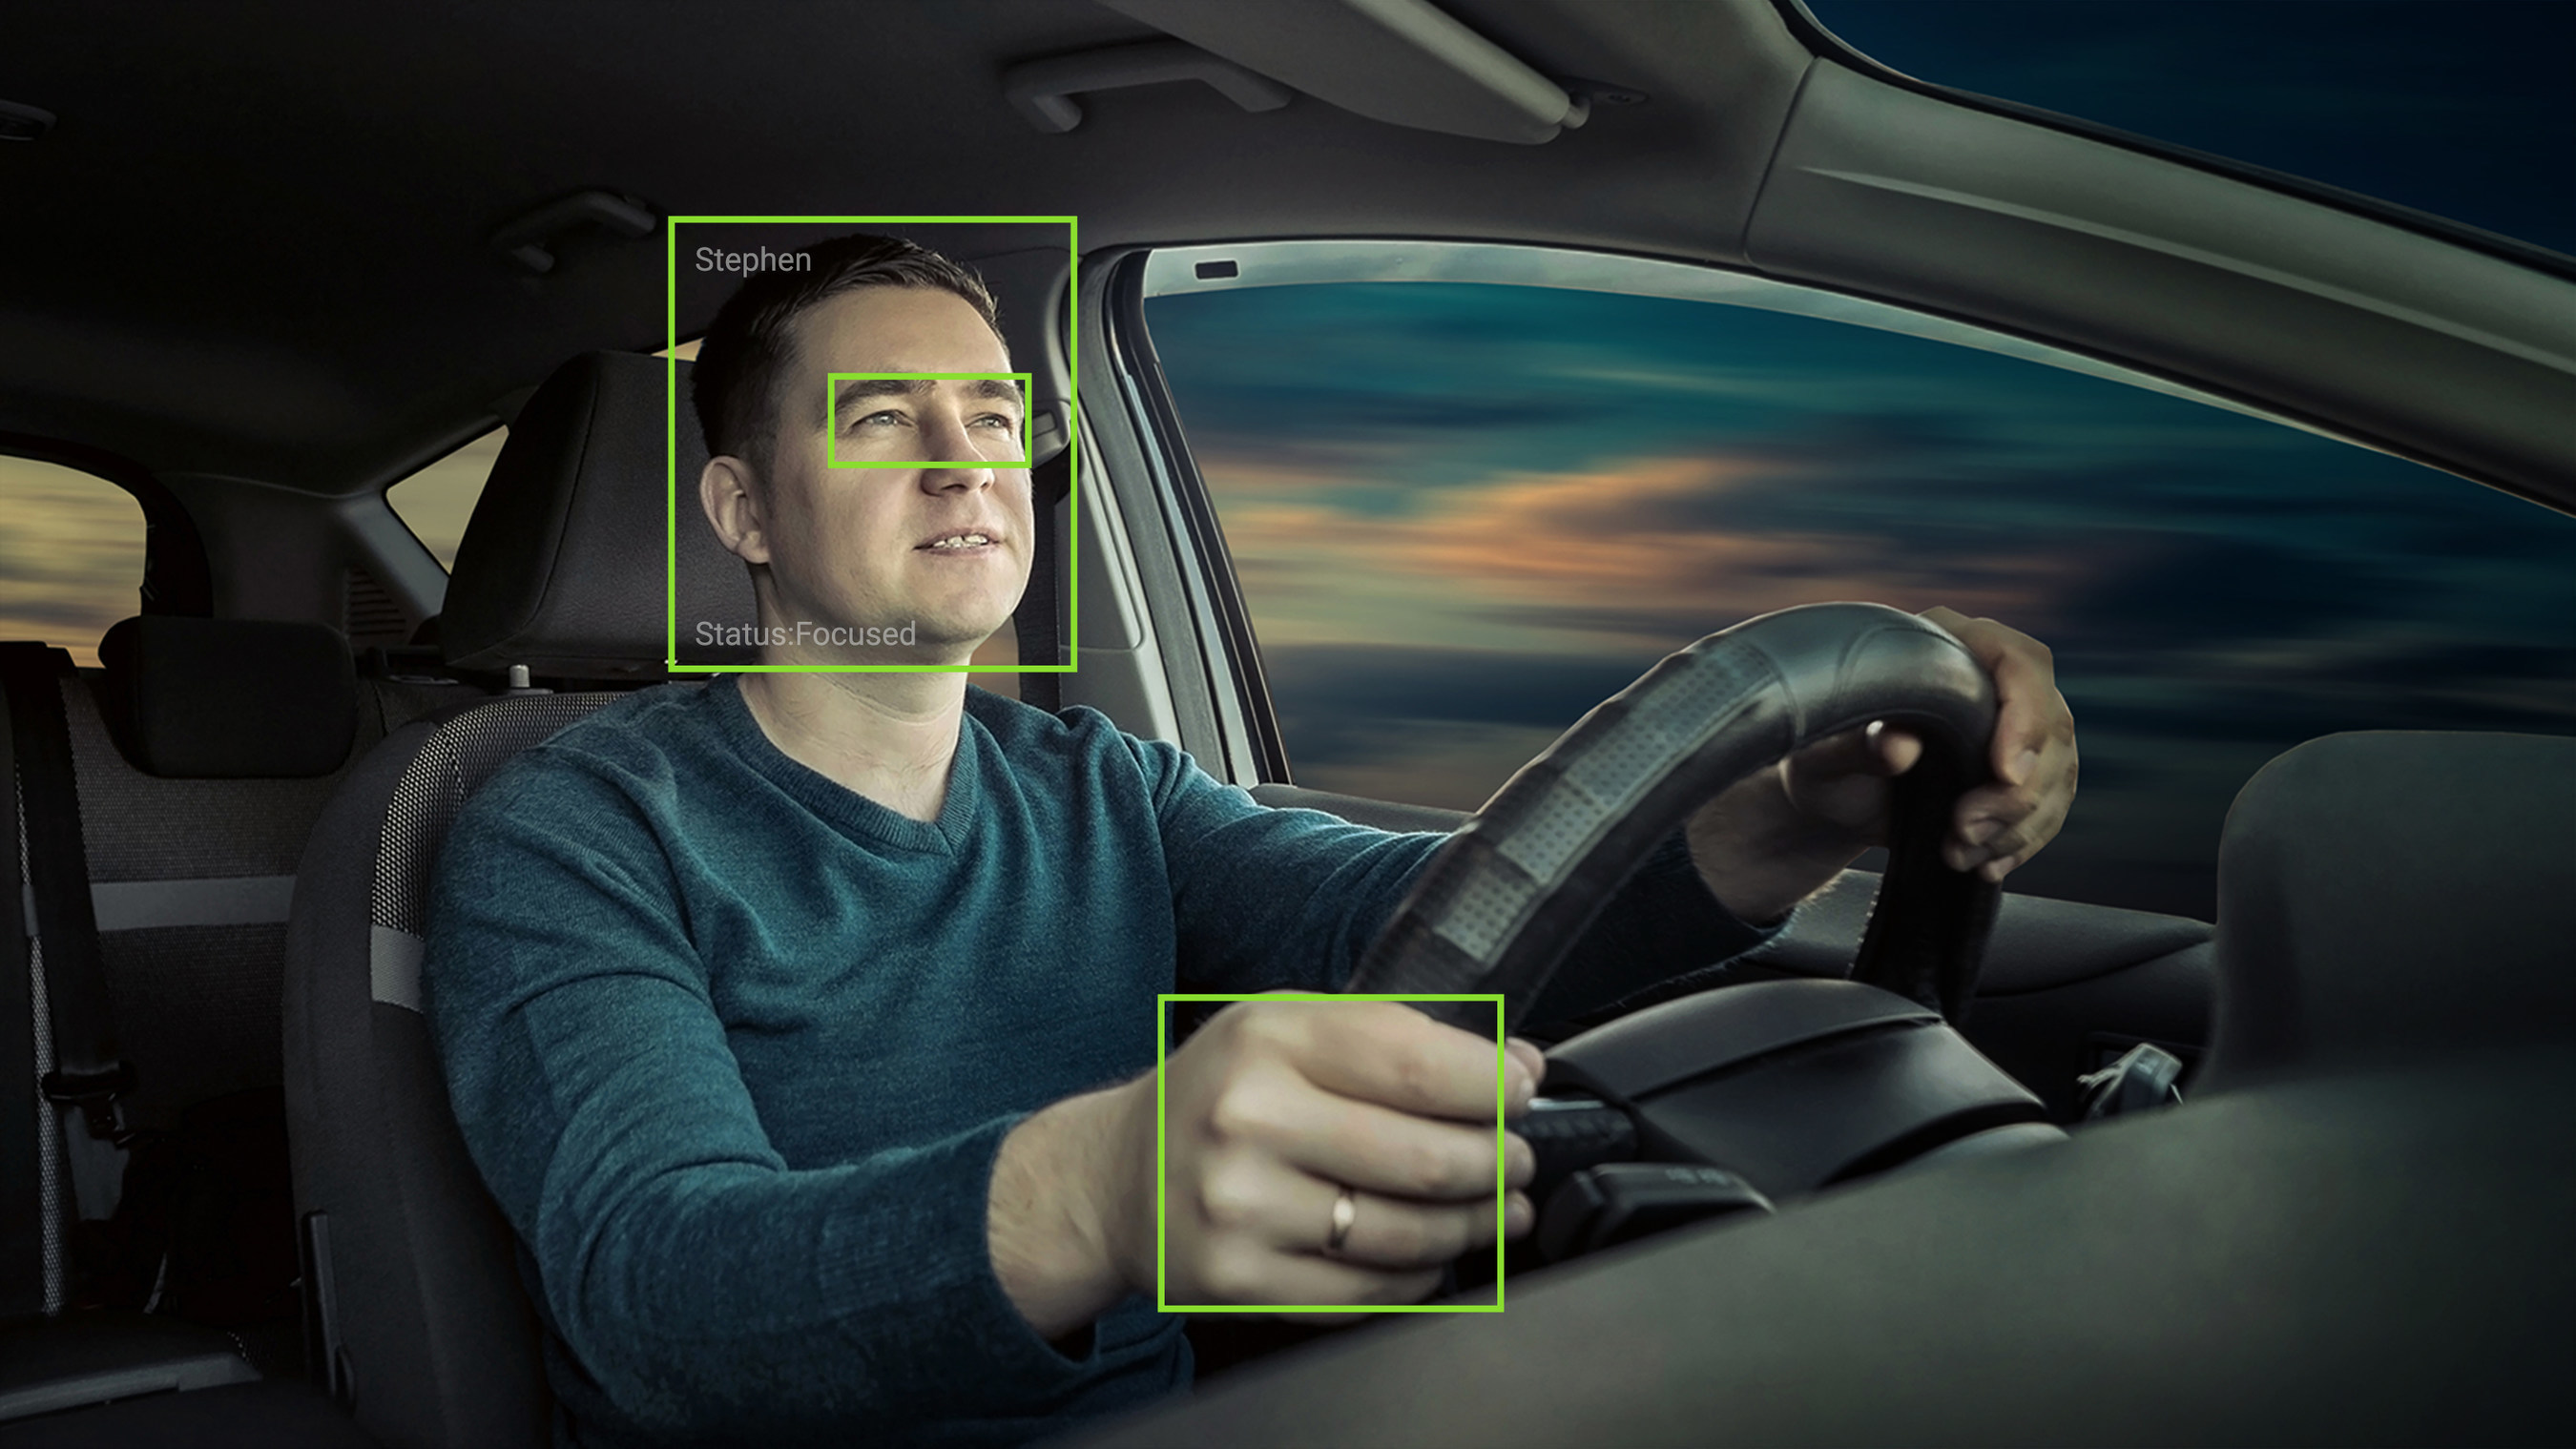

<p style="text-align:center;"><span style="font-size:48px;"><span style="color:navy;"><span style="font-family:cursive;"> Hello everyone! </span> </span>  </span></p>

# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>

<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>


* **[1. A Brief Explanation](#1)**

  - What is the dataset about?
    
  - Importance of this topic
   
   
* **[2. About this project](#2)**

  - Why CNN?
    
  - Which structures?
    
    
    
* **[3. Import Libraries ](#3)**

  - Libraries that we use in this project
  
  
* **[4. Import Dataset ](#4)**  

   - Calling the images from directory 
   
   
   
* **[5. Pre Modeling ](#5)**

   - Delete unreadable images
    
   - Plot random images from each class
    
   - Split data to train, test, prediction
    
   - Create dataframes for train, test, prediction
    
   - Calculate the ratio of images
    
   - Define hyperparameters
    
   - Rescale the images
    
   - Model inputs
   
   
* **[6. AlexNet ](#6)**
    
   - What is AlexNet?
    
   - Model Structure
    
   - Output
   
   
* **[7. VGGNet](#7)** 

  - What is VGGNet?
    
  - Model Structure
    
  - Output
    

* **[8. ResNet](#8)** 

  - What is ResNet?
  
  - Model Structure
    
  - Output
  

* **[9. Result](#9)** 

  - Comparision of (Acc)s and (Loss)s
    
  - Conclusion
    

* **[10. Recommendation Topics](#10)**
    
    - How to connect these models to a Camera?
    
    - How to build a voice alarm system for a Car?
    
    




<a id="1"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explanation </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is the dataset about?**

  - This dataset is about car driver behavior detection. What does it mean?
    Driver behavior detection is a field of research that aims to identify     and analyze the actions of drivers while they are driving. In this dataset we have 5 classes: 1- Safe driving, 2- Talking on phone, 3- Texting on phone, 4- Turning and 5- Other activities
   
   
* **2. Which structures?**
    
  - There are several types of CNN structures that are used in deep learning-based image analysis. In this project, I use three of them. AlexNet, VGGNet and ResNet. These are just some of the most popular CNN structures used in image analysis tasks. Each structure in CNN has its own unique features and advantages and because of that, if we want to use CNN for a case, we have to use more than one structure for comparing which of these structures are better fitting to our images.
    


<a id="2"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">About this project </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. Why CNN?**

  - CNN (Convolutional Neural Network) is a deep learning-based method that is used for driver behavior detection. CNN is a type of neural network that is designed to recognize patterns in images and videos. CNNs are particularly useful for image classification tasks because they can automatically learn to detect features such as edges, corners, and shapes in images. In driver behavior detection, CNNs are used to analyze video footage of drivers and identify patterns of behavior that may indicate unsafe driving practices. 
   
   
* **2. Importance of this topic**
    
  - Data behavior detection is important because it helps to identify potential cybersecurity threats by tracking user behavior and data access activities. By analyzing both user behavior and data access activities, a behavior analytics tool can create a contextual behavior baseline to help discern behaviors that are normal from those that are not and accurately identify critical data threats.
  
    
  
* **Note**
    - I just want to show you the performance of CNN on this topic and It's all about the structure of AlexNet, VGGNet and ResNet. In next projects I will consider the other parts of this project that I mentioned on the recommendation part (Part 10).

<a id="3"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries </p>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from numpy import asarray
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import glob
import os 
import random
import subprocess
import matplotlib.pyplot as plt
from skimage.io import imread
from matplotlib.patches import Rectangle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

<a id="4"></a>
# <p style="padding:10px;background-color:#fda628 ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Dataset </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **Calling the images from directory**

  - There is 5 differente folder for each class. We have to call them to the different variables. For this purpose, I create 5 empty lists and with some **for loop** for iterating in folders with **os.listdir**. After that we can use a **if** for add images with **png** or **jpg** formats.
   You can see these methods in the cell below.


In [ ]:
image_list_other = []
image_list_safe = []
image_list_talking = []
image_list_text = []
image_list_turn = []

for other in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities"): 
    if other.endswith(".png") or other.endswith(".jpg"): 
        image_list_other.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities",
                                             other))
        print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities", other))
        
for safe in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving"): 
    if safe.endswith(".png") or safe.endswith(".jpg"): 
        image_list_safe.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving", 
                                            safe))
        print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/safe_driving",
                           safe))
        
for talking in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone"): 
    if talking.endswith(".png") or talking.endswith(".jpg"): 
        image_list_talking.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone", 
                                               talking))
        print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/talking_phone",
                           talking))
        
for text in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone"): 
    if text.endswith(".png") or text.endswith(".jpg"): 
        image_list_text.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone",
                                            text))
        print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/texting_phone",
                           text))
        
for turn in os.listdir("/kaggle/input/revitsone-5class/Revitsone-5classes/turning"): 
    if turn.endswith(".png") or turn.endswith(".jpg"): 
        image_list_turn.append(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning",
                                            turn))
        print(os.path.join("/kaggle/input/revitsone-5class/Revitsone-5classes/turning", 
                           turn))
    
    

<a id="5"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Pre Modeling </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. Delete unreadable images**

  - Sometimes we have some unreadable images that machine cannot read these images. There are two ways for handling these images. 1- Finding these images on our own way and exploring in the dataset if the dataset has little images (like this case). 2- We can create some functions that allow machine to iterate in images for finding out that which images are readable or not. 
   
   


In [ ]:
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_79.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_4664.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_7973.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13318.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13396.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13541.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_13625.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_20398.jpg')
image_list_other.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/other_activities/img_22266.jpg')

image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_8771.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_62337.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_67523.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_70552.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_84605.jpg')
image_list_turn.remove('/kaggle/input/revitsone-5class/Revitsone-5classes/turning/img_101434.jpg')

In [ ]:
font = {'family':'Times New Roman','color':'#1f211f'}
background_color = '#fab72f'

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Plot random images from each class**

  - This part is for better understanding the images that we have. 
   
   


In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_talking)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who talk with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor= background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_text)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who text with their phone",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_turn)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who turn around",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_safe)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who drive safely",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

In [ ]:
plt.figure(1, figsize=(15, 9))
plt.axis('off')
n = 0
for i in range(4):
    
    n += 1
    random_img = random.choice(image_list_other)
    imgs = imread(random_img)
    plt.suptitle("Random images of people who are in other positions",
                 fontdict = font, fontsize=25
                 ,backgroundcolor=background_color)
    plt.subplot(2,2,n)
    plt.imshow(imgs)

plt.show()

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Split data to train, test, prediction**

  - I deciede to devide dataset in this situation: 1- train = 75%, 2- test = 15% and 3- valid = 5%
   
   


In [ ]:
print("Number of samples in (Class = Other) = " ,len(image_list_other))
print("Number of samples in (Class = Safe Driving) = " ,len(image_list_safe))
print("Number of samples in (Class = Talking Phone) = " ,len(image_list_talking))
print("Number of samples in (Class = Texting Phone) = " ,len(image_list_text))
print("Number of samples in (Class = Turning) = " ,len(image_list_turn))

In [ ]:
print(.75*len(image_list_other) , .2*len(image_list_other) ,.05*len(image_list_other))
print(.75*len(image_list_safe) , .2*len(image_list_safe) ,.05*len(image_list_safe))
print(.75*len(image_list_talking) , .2*len(image_list_talking) ,.05*len(image_list_talking))
print(.75*len(image_list_text) , .2*len(image_list_text) ,.05*len(image_list_text))
print(.75*len(image_list_turn) , .2*len(image_list_turn) ,.05*len(image_list_turn))

In [ ]:
print("Train","Test", "Valid")

train_other = image_list_other[:1589]
test_other = image_list_other[1589:2012]
valid_other = image_list_other[2012:]

print (len(train_other), len(test_other), len(valid_other))

train_safe = image_list_safe[:1652]
test_safe = image_list_safe[1652:2092]
valid_safe = image_list_safe[2092:]

print (len(train_safe), len(test_safe), len(valid_safe))

train_talking = image_list_talking[:1626]
test_talking = image_list_talking[1626:2059]
valid_talking = image_list_talking[2059:]

print (len(train_talking), len(test_talking), len(valid_talking))

train_text = image_list_text[:1652]
test_text = image_list_text[1652:2092]
valid_text = image_list_text[2092:]

print (len(train_text), len(test_text), len(valid_text))

train_turn = image_list_turn[:1547]
test_turn = image_list_turn[1547:1959]
valid_turn = image_list_turn[1959:]

print (len(train_turn), len(test_turn), len(valid_turn))

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **4. Create dataframes for train, test, prediction**

  - If you don't want to use directly from the directories and you want to create some lists of images, you can turn the format of data to dataframes and use **flow from dataframe** method that we see in the next cells.
    For this approach, create a **label** column for use it as a tag or label
   


In [ ]:
train_other_df = pd.DataFrame({'image':train_other, 'label':'Other'})
train_safe_df = pd.DataFrame({'image':train_safe, 'label':'Safe'})
train_talking_df = pd.DataFrame({'image':train_talking, 'label':'Talk'})
train_text_df = pd.DataFrame({'image':train_text, 'label':'Text'})
train_turn_df = pd.DataFrame({'image':train_turn, 'label':'Turn'})

In [ ]:
test_other_df = pd.DataFrame({'image':test_other, 'label':'Other'})
test_safe_df = pd.DataFrame({'image':test_safe, 'label':'Safe'})
test_talking_df = pd.DataFrame({'image':test_talking, 'label':'Talk'})
test_text_df = pd.DataFrame({'image':test_text, 'label':'Text'})
test_turn_df = pd.DataFrame({'image':test_turn, 'label':'Turn'})

In [ ]:
valid_other_df = pd.DataFrame({'image':valid_other, 'label':'Other'})
valid_safe_df = pd.DataFrame({'image':valid_safe, 'label':'Safe'})
valid_talking_df = pd.DataFrame({'image':valid_talking, 'label':'Talk'})
valid_text_df = pd.DataFrame({'image':valid_text, 'label':'Text'})
valid_turn_df = pd.DataFrame({'image':valid_turn, 'label':'Turn'})

In [ ]:
train_df = pd.concat([train_other_df, train_safe_df, train_talking_df, train_text_df, train_turn_df])
test_df = pd.concat([test_other_df, test_safe_df, test_talking_df, test_text_df, test_turn_df])
val_df = pd.concat([valid_other_df, valid_safe_df, valid_talking_df, valid_text_df, valid_turn_df])

In [ ]:
train_df.head()

In [ ]:
print("Number of rows in train dataframe is: ", len(train_df))
print("Number of rows in test dataframe is: ", len(test_df))
print("Number of rows in val dataframe is: ", len(val_df))

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **5. Calculate the ratio of images**

  - It's really important in some cases for knowing the ratio of images that we use. We can use **cv2.imread** for this part.
   


In [ ]:
random_img_height = random.choice(train_other)

In [ ]:
image= cv2.imread(random_img_height)

height, width= image.shape[:2]

print("The height is ", height)

print("The width is ", width)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **6. Define hyperparameters**

  - Some of the hyperparameters should be considering before the model goes to start. I set Batch size as 64, ofcourse you can use 32 or any other popular numbers or you can use some functions for checking the best number of that but it costs lots of run time and I just want to pick some experimental value. Also for AlexNet, ResNet and VGGNet its popular to use height and width as a 240*240 format.
   


In [ ]:
Batch_size = 64
Img_height = 240
Img_width = 240

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **7. Rescale the images**

  - Its really important to rescale the images and put all of the images in a same shape for input layer of model. 
   


In [ ]:
trainGenerator = ImageDataGenerator(rescale=1./255.)
valGenerator = ImageDataGenerator(rescale=1./255.)
testGenerator = ImageDataGenerator(rescale=1./255.)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **8. Input Model**

  - Now we can use **flow from dataframe** that mentioned before. It helps to call images from some dataframes and mention the label as target.
   


In [ ]:
trainDataset = trainGenerator.flow_from_dataframe(
  dataframe=train_df,
  class_mode="categorical",
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width) #set the height and width of the images
)

testDataset = testGenerator.flow_from_dataframe(
  dataframe=test_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

valDataset = valGenerator.flow_from_dataframe(
  dataframe=val_df,
  class_mode='categorical',
  x_col="image",
  y_col="label",
  batch_size=Batch_size,
  seed=42,
  shuffle=True,
  target_size=(Img_height,Img_width)
)

<a id="6"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">AlexNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is AlexNet?**

  - AlexNet is a convolutional neural network (CNN) architecture that was introduced by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012. It is used primarily for image recognition and classification tasks. AlexNet was the winner of the ImageNet Large Scale Visual Recognition Challenge in 2012, which marked a breakthrough in deep learning. The network contains eight layers; the first five are convolutional layers, some of them followed by max-pooling layers, and the last three are fully connected layers. The network is split into two copies, each run on one GPU. AlexNet uses ReLU activation functions and dropout regularization to prevent overfitting. The architecture of AlexNet has inspired many other CNN architectures that have been developed since its introduction.
   


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of AlexNet in the cell below.
   


In [ ]:
def AlexNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(256, 5, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(384, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(3, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_Alex = models.Model(inputs=inp, outputs=x)

    return model_Alex

model_Alex = AlexNet()
model_Alex.summary()

In [ ]:
tf.keras.utils.plot_model(
    model_Alex,
    to_file='alex_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Alex.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
Alex_model = model_Alex.fit(trainDataset, epochs=20, validation_data=valDataset)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [ ]:
training_loss_alex = Alex_model.history['loss']
val_loss_alex = Alex_model.history['val_loss']
training_acc_alex = Alex_model.history['accuracy']
val_acc_alex = Alex_model.history['val_accuracy']

In [ ]:
epoch_count = range(1, len(training_loss_alex) + 1)

# Visualize loss history
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_alex, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_alex, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in ALEXNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<a id="7"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">VGGNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is VGGNet?**

  - VGGNet, also known as Visual Geometry Group, is a standard deep Convolutional Neural Network (CNN) architecture with multiple layers. The “deep” refers to the number of layers with VGG-16 or VGG-19 consisting of 16 and 19 convolutional layers, respectively. The VGG architecture is the basis of ground-breaking object recognition models. Developed as a deep neural network, the VGGNet also surpasses baselines on many tasks and datasets beyond ImageNet. Moreover, it is still one of the most popular image recognition architectures.
   


<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of VGGNet in the cell below.
   


In [ ]:
def VGGNet():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 3, 1, activation='relu')(inp)
    x = layers.Conv2D(64, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.Conv2D(128, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.Conv2D(256, 3, 1, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.Conv2D(512, 3, 1, activation='relu')(x)
    x = layers.MaxPooling2D(2, 2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)

    model_VGG = models.Model(inputs=inp, outputs=x)

    return model_VGG

model_VGG = VGGNet()
model_VGG.summary()

In [ ]:
tf.keras.utils.plot_model(
    model_VGG,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_VGG.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
VGG_model = model_VGG.fit(trainDataset, epochs=20, validation_data=valDataset)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [ ]:
training_loss_vgg = VGG_model.history['loss']
val_loss_vgg = VGG_model.history['val_loss']
training_acc_vgg = VGG_model.history['accuracy']
val_acc_vgg = VGG_model.history['val_accuracy']

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_vgg, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in VGGNET')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<a id="8"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ResNet </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. What is ResNet?**

  - ResNet (Residual Network) is a deep learning-based model that uses residual connections to improve training performance and accuracy. The architecture of ResNet is designed to solve the problem of vanishing gradients that occurs when training deep neural networks. ResNet introduces the concept of residual blocks, which use skip connections to connect activations of a layer to further layers by skipping some layers in between. This forms a residual block, and ResNets are made by stacking these residual blocks together. The approach behind this network is instead of layers learning the underlying mapping, we allow the network to fit the residual mapping. So, instead of say H (x), initial mapping, let the network fit, F (x) := H (x) - x which gives H (x) := F (x) + x. The skip connection connects activations of a layer to further layers by skipping some layers in between. This results in training a very deep neural network without the problems caused by vanishing/exploding gradient. ResNet is widely used in image classification tasks and has inspired many other CNN architectures that have been developed since its introduction.
   



<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Model Structure**

  - You can see the structure of VGGNet in the cell below.
   


In [ ]:
def ResNet34 ():
    inp = layers.Input((240, 240, 3))
    x = layers.Conv2D(64, 7, 2,padding='valid', activation='relu')(inp)
    x = layers.MaxPooling2D(strides=2, padding='same')(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    x = layers.Conv2D(128, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
     
        
    x = layers.Conv2D(256, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    
    
    
    x = layers.Conv2D(512, 3, 2,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(512, 3, 1,padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(4096, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(5, activation='softmax')(x)
    
    
    
    
    model_Res = models.Model(inputs=inp, outputs=x)

    return model_Res

model_Res = ResNet34()
model_Res.summary()


In [ ]:
tf.keras.utils.plot_model(
    model_Res,
    to_file='res_model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

In [ ]:
model_Res.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
RES_model = model_Res.fit(trainDataset, epochs=20, validation_data=valDataset)

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **3. Output**

  - We can plot the output of model for each epoch. For this matter, we can use **.history** and extract the **train and valid loss and accuracy**. Then we can plot both of them and find out the path of learning.
   


In [ ]:
training_loss_res = RES_model.history['loss']
val_loss_res = RES_model.history['val_loss']
training_acc_res = RES_model.history['accuracy']
val_acc_res = RES_model.history['val_accuracy']

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_loss_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Loss', 'Val Loss'])
plt.title('Number of epochs & Loss in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(epoch_count, training_acc_res, 'r--', color= 'navy')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'orangered', linewidth = '2.5', label='line with marker')
plt.legend(['Training Acc', 'Val Acc'])
plt.title('Number of epochs & Accuracy in RESNET34')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.xticks(np.arange(1,21,1))
plt.plot();
plt.show();

<a id="9"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Result </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. Comparision of (Acc)s and (Loss)s**

  - We can put all of the results in a one plot and comparing the behavior of models outputs.
   



In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_loss_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_loss_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Loss in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

In [ ]:
plt.figure(figsize=(10,5), dpi=200)

plt.plot(epoch_count, val_acc_alex, '--bo',color= 'navy',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_vgg, '--bo',color= 'orangered',
         linewidth = '2.5', label='line with marker')
plt.plot(epoch_count, val_acc_res, '--bo',color= 'black',
         linewidth = '2.5', label='line with marker')
plt.legend(['AlexNet', 'VGGNet','ResNet'])
plt.title('Number of epochs & Accuracy in All Models')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(1,21,1))
plt.show();

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. Conclusion**

  - As we can see, the result of AlexNet and VGGNet is good but the ResNet model not fitted in a good way. This is what i was mentioned about why we have to use more than one structure models. 
   



<a id="10"></a>
# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Recommendation Topics </p>

<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **1. How to connect these models to a Camera?**

  - To connect deep learning models to a camera with Python, you can use OpenCV, which is an open-source computer vision library. OpenCV provides a simple and easy-to-use interface for capturing video from a camera and processing it in real-time using deep learning models. Here are some steps to get started:
Install OpenCV and other required libraries such as TensorFlow, Keras, etc. on your system.
Connect your camera to your computer and make sure it is working properly.
Write a Python script that captures video from the camera using OpenCV and processes it using your deep learning model.
Run the script and test it with your camera.
   



<div style = 'border : 3px solid non; background-color:#f2f2f2 ; ;padding:10px'>


* **2. How to build a voice alarm system for a Car?**

  - To build a voice alarm system for a car with Python, you can use the following steps:
Install the required libraries, such as OpenCV, pyttsx3, and threading. These libraries will help you to capture video from a camera, convert text to speech, and run multiple tasks simultaneously.
Define a function that will play a voice message when motion is detected. You can use pyttsx3 to create an engine object and set its properties, such as voice, rate, and volume. Then you can use the say method to speak a message and the runAndWait method to wait until the message is finished.
Define another function that will detect motion using OpenCV. You can use cv2.VideoCapture to access the camera and cv2.cvtColor to convert the frames to grayscale. Then you can use cv2.absdiff to calculate the difference between two consecutive frames and cv2.threshold to binarize the image. If the number of white pixels in the image is greater than a certain threshold, it means that motion is detected.
Use threading to run both functions in parallel. You can create two thread objects and pass the functions as arguments. Then you can use the start method to start the threads and the join method to wait until they finish.
Test your code and adjust the parameters as needed. You can change the threshold value, the voice message, or the camera index according to your preference.
   



# <p style="padding:10px;background-color:#fab72f ;margin:0;color:#ffffff;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Warm Wishes</p>